In [23]:
### First we will import module that helps to import MATLAB datafile
from scipy.io import loadmat

In [24]:
#  training data stored in arrays X, y
data = loadmat('/Users/maheshworpaudel/Desktop/coursera_in_python/week4_kUJEz17MRN6CRM9ezITeZw_b7ca01e1a2714e9fb931b8d22baf0df1_ex3-octave//ex3data1.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}


There are 5000 training examples in this data file, where each training
example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is
represented by a 
floating point number indicating the grayscale intensity at
that location. The 20 by 20 grid of pixels is "unrolled" into a 400-dimensional
vector. Each of these training examples becomes a single row in our data
matrix X. This gives us a 5000 by 400 matrix X where every row is a training
example for a handwritten digit image.

The second part of the training set is a 5000-dimensional vector y that
contains labels for the training set. To make things more compatible with
Octave/MATLAB indexing, where there is no zero index, the digit zero has been mapped to the value ten. Therefore, a "0" digit is labeled as "10", while
the digits "1" to "9" are labeled as they are.

In [36]:
X, y = data['X'], data['y'].ravel()

In [37]:
print(X)
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5000, 400)


In [38]:
print(y)

[10 10 10 ...  9  9  9]


In [39]:
# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0
print(y)
# Number of training examples
m = y.size
print('The size of y is', m)

[0 0 0 ... 9 9 9]
The size of y is 5000


We will begin by visualizing a subset of the training set. We will randomly select 100 training examples from X.

In [41]:
import numpy as np

In [106]:
row_id = np.random.randint(low=1, high=len(X), size = 100)

In [107]:
trainX = X[row_id]
print(trainX)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [108]:
trainy = y[row_id]
print(trainy)

[1 3 8 4 5 3 2 6 7 3 3 2 6 1 0 9 7 7 3 0 1 1 6 2 5 9 8 1 8 9 1 1 6 4 5 4 9
 6 7 6 9 5 9 6 0 6 2 0 1 7 3 7 2 0 1 8 3 6 8 6 7 3 6 3 2 4 8 7 4 7 7 4 9 0
 2 4 8 1 6 9 8 3 2 0 7 0 8 9 4 9 5 8 5 5 8 9 8 7 0 7]


In [109]:
import matplotlib.pyplot as plt
def displayData(X, example_width=None, figsize=(5, 5)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        # Display Image
        h = ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                      cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

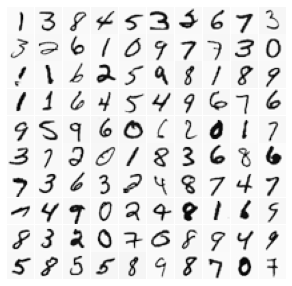

In [110]:
displayData(trainX)

In [89]:
# logistic regression for multi-class classification using a one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(trainX, trainy)

OneVsRestClassifier(estimator=LogisticRegression())

In [97]:
# make predictions
yhat = ovr.predict(X[0].reshape((1, 400)))
print(yhat)

[0]


In [98]:
y_predictions = ovr.predict(X)

In [99]:
np.mean(y_predictions == y) * 100

74.98